# Handmade Neural Network
_______________________________________________________________________________________________________________________________
## Skeleton of the Code:

The following code will be presented in 6 distinct steps

* Creating data - We have created X to Y mappings of a fairly complex polynomial function $ y = (x+3)(x-2)^2(x+1)^3 $.
* Creating specific functions - To build the neural network we will implement several specific functions for their specific tasks as suggested by their names.
* Creating model - To build the neural network we will create a model function that will bring use of all the specific functions, implemented earlier, in a cohesive way.
* Training model - Finally we will train our model by passing in the data and appropriate keyword arguments.  
* Validating model - Then we will validate our model by using the validtaion data.
* Plotting comparisons - Finally we will plot the comparison between the actual values from our validation set and the values predicted by the model.

In [1]:
#importing packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils

#importing style
plt.style.use('seaborn')

#setting up rc settings
mpl.rcParams['axes.grid'] = False
mpl.rcParams['lines.linewidth'] = 0.7
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.figsize'] = 12.5, 7.5

### Creating data:

We have created X to Y mappings for a fairly complex polynomial function $ y = (x+3)(x-2)^2(x+1)^3 $.
We have shuffled the data (X Values) so as improve the generalizability of neural network and to remove any bias.
We are using 1000 examples from domain [-3 , 2.5] to train and 100 examples from domain [-4, 4] to validate the model.  

In [2]:
#creating training data
X = np.linspace(-3, 2.5, 1000).reshape(1, 1000)
X = np.random.permutation(X)
Y = (X+3)*(np.power((X-2),2))*(np.power((X+1), 3))

#creating validation data
X_Val = np.linspace(-4, 4, 100).reshape(1,100)
Y_Val = (X_Val+3)*(np.power((X_Val-2),2))*(np.power((X_Val+1), 3))

In [3]:
#determining dimensions of data
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m =', m, 'training examples!')

The shape of X is: (1, 1000)
The shape of Y is: (1, 1000)
I have m = 1000 training examples!


### Creating specific functions:

To build the neural network we will implement several specific functions for their specific tasks as suggested by their names.
There are 11 specific functions in total which will be incorporated in the model function later to make it easier to implement and control the functionality of the neural network architecture.

In [4]:
def layer_structure(X, Y, architecture):
    
    """
    Implements a function to intialize the structure of the network i.e. the number of layers and
    corresponding number of units in each layer.
    
    Arguments:
    X -- data, numpy array of shape (1, number of examples).
    Y -- numpy array of shape (1, number of examples) containing corresponding y mappings
    of the function f: x -> y.
    architecture -- python list containing the configuration of the network.
    For eg : [10, 5, 1] means network has 3 layers with 10, 5 and 1 units in corresponding layers.
    
    Returns:
    all_layers_dims -- numpy array containing the configuration of the network (including input layer).
    """
    
    n_x = np.array([X.shape[0]])
    n_y = np.array([Y.shape[0]])
    
    #dimensions of (hidden + output) layers
    hidden_output_layers_dims = np.array(architecture)                                      
    
    assert hidden_output_layers_dims[-1] == n_y[0]
    
    hidden_layers_dims = hidden_output_layers_dims[:-1]                          
    
    all_layers_dims = np.concatenate((n_x, hidden_layers_dims, n_y))             
    
    global L_
    L_ = len(all_layers_dims)                                                    
    
    #number of (hidden + output) layers
    global L
    L = len(hidden_layers_dims) + 1                                              

    return all_layers_dims

In [5]:
def initialize_parameters_deep(all_layers_dims):
    
    """
    Implements a function that initializes each layer of the network.
    
    Arguments:
    all_layers_dims --  numpy array containing the configuration of the network (including input layer).
    
    Returns:
    parameters -- initialized parameters (weights and biases) by the function.
    """
    
    parameters = {}
    
    for l in range(1, L_):
        parameters['W' + str(l)] = np.random.randn(all_layers_dims[l], all_layers_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((all_layers_dims[l], 1))
        
    return parameters

In [6]:
def activation_structure(activations):
    
    """
    Implements a function that pairs each layer of the network with its corresponding activation function.
    
    Arguments:
    activations -- python list containing the names of activations for corresponding layers.
    
    Returns:
    structure -- python list pairing each layer with its corresponding activation function.
    """
    
    #combined structure in form like ---[(1, "relu"),(2, "sigmoid"),(3, "linear")] for eg.
    structure = []
    
    for l, activation in enumerate(activations, 1):
        structure.append((l, activation))
        
    return structure  

In [7]:
def linear_forward(A, W, b):
    
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples).
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer).
    b -- bias vector, numpy array of shape (size of the current layer, 1).

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter.
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently.
    """
    
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    
    return Z, cache

In [8]:
def linear_activation_forward(A_prev, W, b, activation):
    
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples).
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer).
    b -- bias vector, numpy array of shape (size of the current layer, 1).
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "linear".

    Returns:
    A -- the output of the activation function, also called the post-activation value.
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently.
    """
    
    if activation == "linear":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = utils.linear_function(Z)
        
    elif activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = utils.sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = utils.relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [9]:
def L_model_forward(X, parameters, structure):
    
    """
    Implement forward propagation for the network.
    
    Arguments:
    X -- data, numpy array of shape (1, number of examples).
    parameters -- output of initialize_parameters_deep().
    structure -- python list pairing each layer with its corresponding activation function.
    
    Returns:
    AL -- last post-activation value.
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1).
    """
    
    caches = []
    A = X
    
    for l, activation in (structure):

        if l == L:
            AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = activation)
            caches.append(cache)
        
        else:
            A_prev = A
            A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = activation)
            caches.append(cache)

    
    return AL, caches
    

In [10]:
def compute_cost(AL, Y):
    
    """
    Implements the cost function.

    Arguments:
    AL -- prediction vector corresponding to your y mappings, shape (1, number of examples).
    Y -- true "mapping" vector (for example: containing y = 12 if x = 0 ), shape (1, number of examples).

    Returns:
    cost -- mean squared error.
    """
    
    #simple mean squared error
    cost = 1/(2*m) * np.sum(np.square(AL - Y))
    
    cost = np.squeeze(cost)
    
    return cost

In [11]:
def linear_backward(dZ, cache):
    
    """
    Implement the linear portion of backward propagation for a single layer (layer l).

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l).
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer.

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev.
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W.
    db -- Gradient of the cost with respect to b (current layer l), same shape as b.
    """

    A_prev, W, b = cache
    
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [12]:
def linear_activation_backward(dA, cache, activation):
    
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l.
    cache -- tuple of values (linear_cache, activation_cache) we stored for computing backward propagation efficiently.
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "linear".
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev.
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W.
    db -- Gradient of the cost with respect to b (current layer l), same shape as b.
    """
    
    linear_cache, activation_cache = cache
    
    if activation == "linear":
        dZ = utils.linear_function_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
    
    elif activation == "sigmoid":
        dZ = utils.sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "relu":
        dZ = utils.relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [13]:
def L_model_backward(AL, Y, caches, structure):
    
    """
    Implement the backward propagation for the network.
    
    Arguments:
    AL -- prediction vector, output of the forward propagation (L_model_forward()).
    Y -- true "mapping" vector.
    caches -- a python tuple containing "linear_cache" and "activation_cache".
    structure -- python list pairing each layer with its corresponding activation function.
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    
    grads = {}
    
    #intialisation of dAL = dL/dA = 2(AL - Y)
    dAL = 2*(AL - Y)
    
    for l, activation in reversed(structure):

        if l == L:
            #indexing of caches is from 0 to L-1 (L elements in total corresponding to each layer)
            current_cache = caches[L-1]
            dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation)
            grads['dA' + str(L-1)], grads['dW' + str(L)], grads['db' + str(L)] = dA_prev_temp, dW_temp, db_temp 
    
        else:
            current_cache = caches[l-1]
            dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l)], current_cache, activation)
            grads['dA' + str(l-1)], grads['dW' + str(l)], grads['db' + str(l)] = dA_prev_temp, dW_temp, db_temp
        
        
    return grads

In [14]:
def update_parameters(parameters, grads, learning_rate):
    
    """
    Implement the function to update parameters using gradient descent.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
    grads -- python dictionary containing your gradients, output of L_model_backward().
    learning_rate -- learning rate of the gradient descent update rule.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate*grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*grads['db'+str(l+1)]
        
    return parameters
        

### Creating model:

To build the neural network we will create a model function that will bring use of all the specific functions, implemented earlier, in a cohesive way.
We will also render a plot to help visualise the value of the cost after every 10000 iterations of gradient descent. We plot on a log scale so as to visualise even very small changes in the cost in later iterations.

In [15]:
def dnn_model(X, Y, architecture, activations, learning_rate, num_iterations, print_cost):
    
    """
    Implements a L-layer neural network.
    
    Arguments:
    X -- data, numpy array of shape (1, number of examples).
    Y -- numpy array of shape (1, number of examples) containing corresponding y mappings
    of the function f: x -> y.
    architecture -- python list containing the configuration of the network.
    activations -- python list containing the names of activations for corresponding layers.
    learning_rate -- learning rate of the gradient descent update rule.
    num_iterations -- number of iterations of the optimization loop.
    print_cost -- if True, it prints the cost every 10000 steps.
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    structure -- python list pairing each layer with its corresponding activation function.
    """
    
    #registering cost after each 1000 iterations
    costs = []
    
    all_layers_dims = layer_structure(X, Y, architecture)
    parameters = initialize_parameters_deep(all_layers_dims)
    structure = activation_structure(activations)
    
    for i in range(num_iterations):
        
        AL, caches = L_model_forward(X, parameters, structure)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches, structure)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration" , i, "is", cost)
            costs.append(cost)
    
    #plotting cost vs iterations
    fig, ax = plt.subplots()
    ax.plot(np.squeeze(costs))
    ax.set_xlabel('number of iterations')
    ax.set_ylabel('cost')
    ax.set_yscale('log')
    
    return parameters, structure
            

### Training model:

Finally we will train our model by passing in the data and appropriate keyword arguments.
We will train for 100000 iterations of gradient descent. I have chosen 3 layers with sigmoid, relu, and linear activations respectively. Optimal learning rate was determined by hit and trial method.

Cost after iteration 0 is 197.49539282126293
Cost after iteration 10000 is 5.29387905571494
Cost after iteration 20000 is 0.8805687659740656
Cost after iteration 30000 is 0.3665101878586403
Cost after iteration 40000 is 0.21108962478174528
Cost after iteration 50000 is 0.14599333847113
Cost after iteration 60000 is 0.11699198823729645
Cost after iteration 70000 is 0.10166461290098272
Cost after iteration 80000 is 0.09085294715097803
Cost after iteration 90000 is 0.07791192746300145


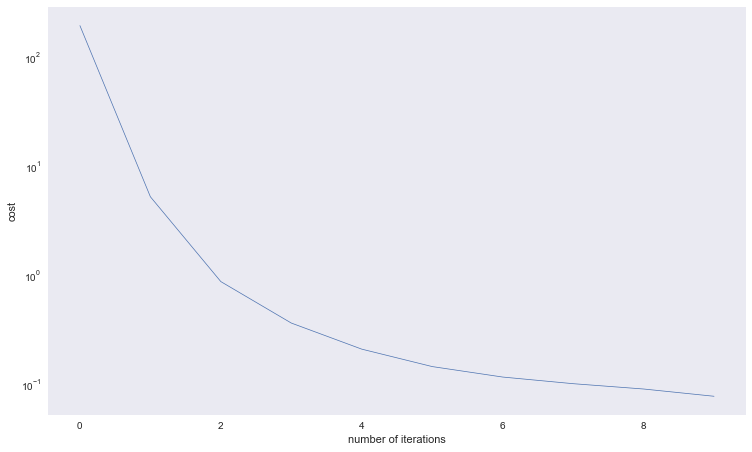

In [16]:
parameters, structure = dnn_model(X, Y, [10, 5, 1], ["sigmoid", "relu", "linear"], num_iterations = 100000, print_cost=True, learning_rate = 5e-3)

### Validating model:

Then we will validate our model by using the validtaion data created earlier. First we will predict on validation data (X_Val), then we will compare the predicted values with the actual values (Y_Val) and determine the difference between the two.

In [17]:
def predict(X_Val, parameters, structure):
    
    """
    Implements a function to predict on validation set.
    
    Arguments:
    X_Val -- validation data, numpy array of shape (1, number of examples in validation set).
    parameters -- parameters learnt by the model. They can then be used to predict.
    structure -- python list pairing each layer with its corresponding activation function.
    
    Returns:
    predictions -- prediction vector, output of the forward propagation (L_model_forward()).
    """
    
    AL, _ = L_model_forward(X_Val, parameters, structure)
    
    predictions = AL
    
    return predictions

In [18]:
def validation_model(X_Val, Y_Val, parameters, structure):
    
    """
    Implements a function to validate our predictions against validation set.
    
    Arguments:
    X_Val -- validation data, numpy array of shape (1, number of examples in validation set).
    Y_Val -- numpy array of shape (1, number of examples in validation set) containing corresponding
    y mappings of the function f: x -> y from validation set.
    parameters -- parameters learnt by the model. They can then be used to predict.
    structure -- python list pairing each layer with its corresponding activation function.
    
    Returns:
    difference -- vector values, containing absolute differences between predicted and actual values.
    """
    
    AL = predict(X_Val, parameters, structure)
    
    #calculating difference against actual values of the polynomial function
    difference = np.abs(AL - Y_Val)

    return difference


In [19]:
predictions = predict(X_Val, parameters, structure)
difference = validation_model(X_Val, Y_Val, parameters, structure)

### Plotting comparisons: 

Finally we will plot the comparison between the actual values from our validation set and the values predicted by the model.
We will plot all three - prediction, validation data, and the difference between the two on same axes to better visualise the comparisons.
Note - If the validation data points are not visible that is because they have been overlapped by the prediction data points.

(-5.0, 5.0, -70.0, 70.0)

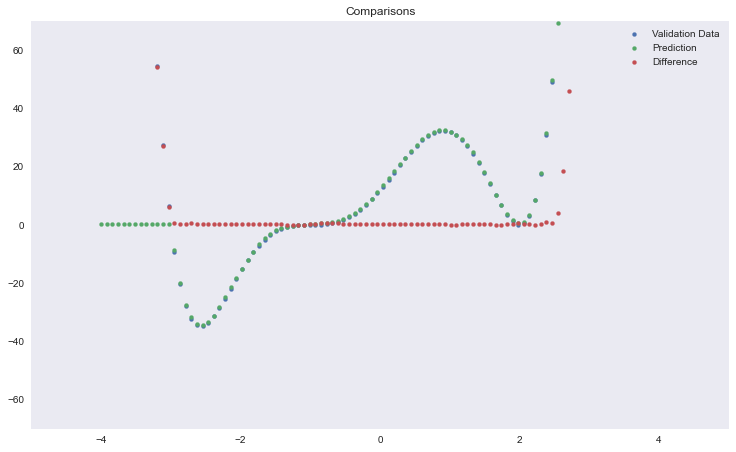

In [20]:
#rendering plot for comparison
fig, ax = plt.subplots()
ax.scatter(X_Val, Y_Val, label = 'Validation Data')
ax.scatter(X_Val, predictions, label = 'Prediction')
ax.scatter(X_Val, difference, label = 'Difference')
ax.set_title('Comparisons')
ax.legend()
ax.axis([-5, 5, -70, 70])

## Observations:

* The model perfomance is really good in the domain in which it was trained i.e. [-3, 2.5] but the performance deteriorates outside of that domain.
* Hence the model is clearly overfitting.